<a href="https://colab.research.google.com/github/LaxminarayananV/intensity_analysis/blob/main/intensity_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter a sentence: Smiling faces danced under the radiant sun, spreading happiness like wildflowers in bloom

Prediction Results:
SVM prediction: happy
Random Forest prediction: happy
Gradient Boosting prediction: happy

Accuracy and Classification Report:
SVM accuracy: 0.79
SVM classification report:
              precision    recall  f1-score     support
angry          0.866197  0.809211  0.836735  152.000000
happy          0.670391  0.875912  0.759494  137.000000
sad            0.896552  0.655462  0.757282  119.000000
accuracy       0.786765  0.786765  0.786765    0.786765
macro avg      0.811047  0.780195  0.784503  408.000000
weighted avg   0.809302  0.786765  0.787625  408.000000

Random Forest accuracy: 0.78
Random Forest classification report:
              precision    recall  f1-score     support
angry          0.815789  0.815789  0.815789  152.000000
happy          0.700000  0.817518  0.754209  137.000000
sad            0.854167  0.689076  0.762791  119.000000
accuracy       

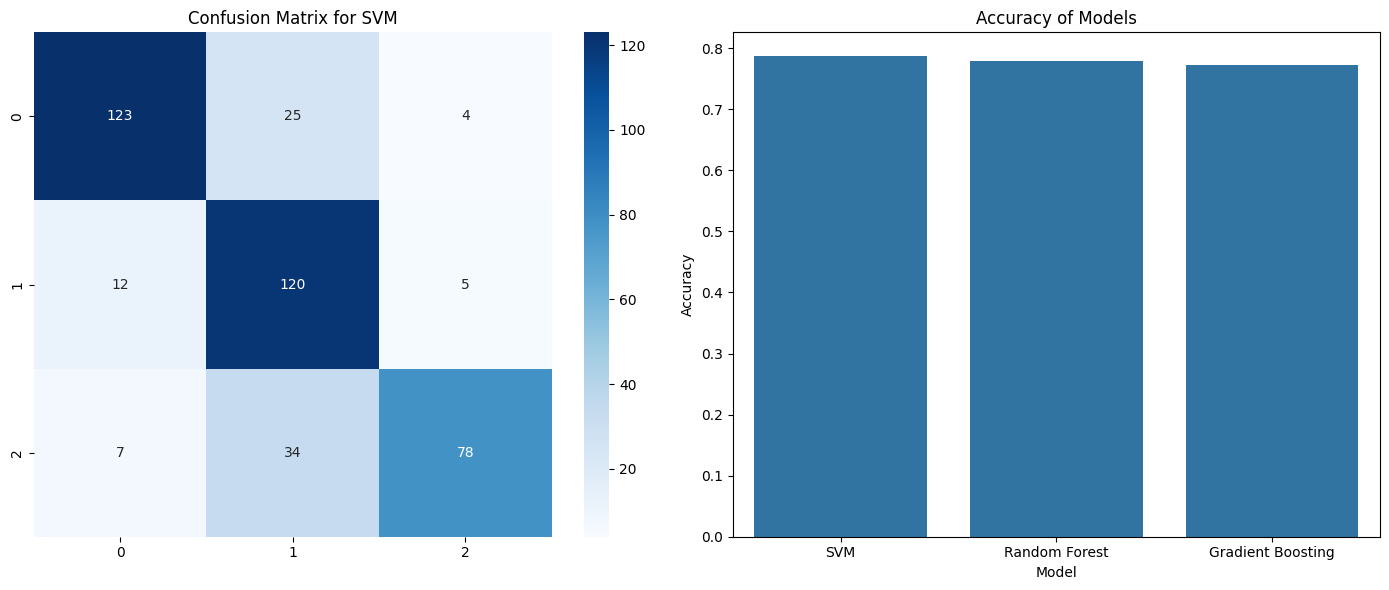

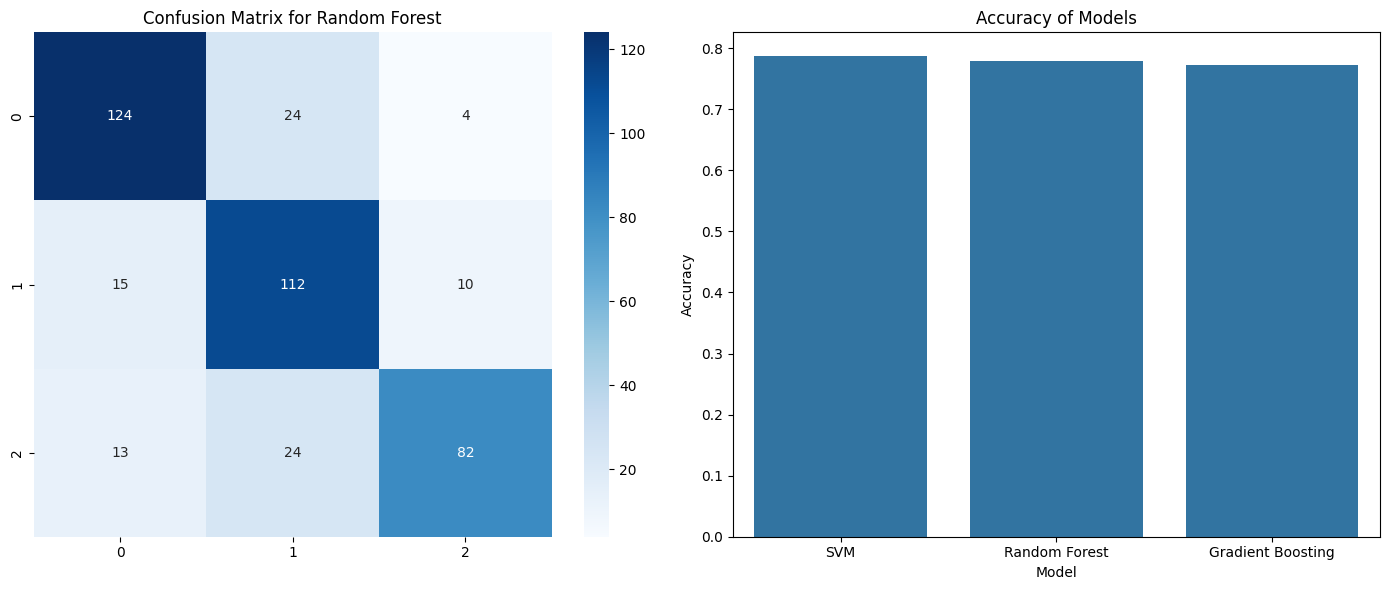

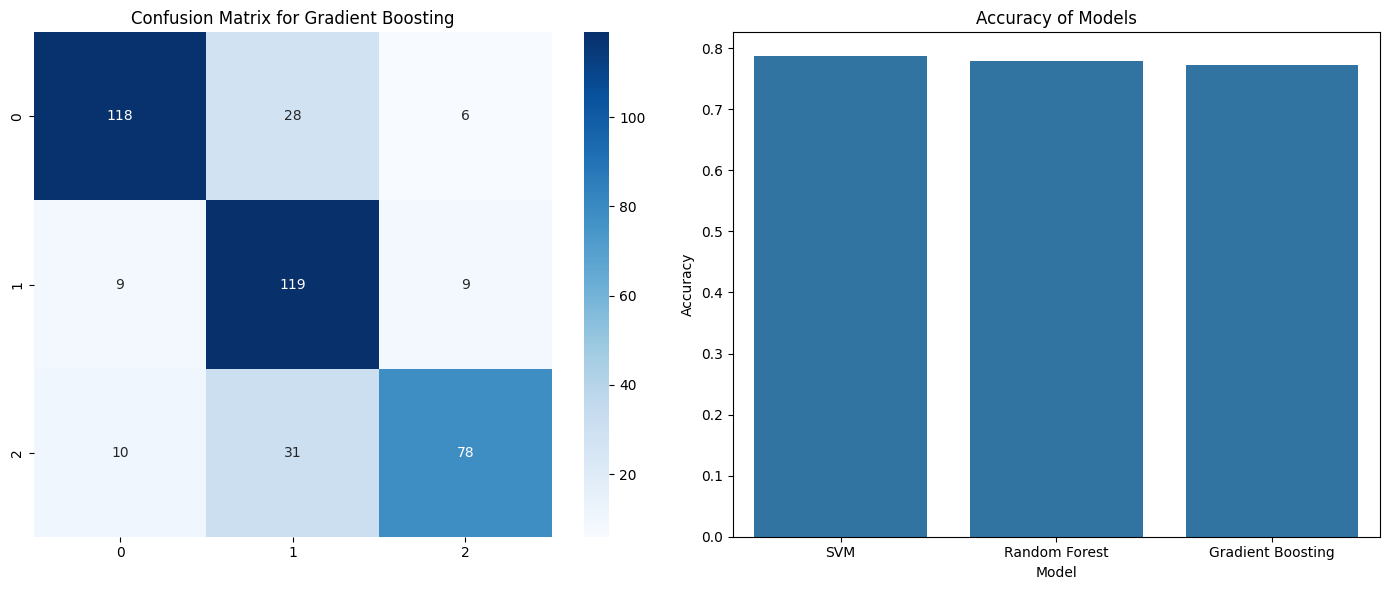

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import numpy for matplotlib usage
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def load_data():
    # Load data from files
    data_angry = pd.read_csv("angriness.csv")
    data_happy = pd.read_csv("happiness.csv")
    data_sad = pd.read_csv("sadness.csv")

    # Add intensity labels
    data_angry['intensity'] = 'angry'
    data_happy['intensity'] = 'happy'
    data_sad['intensity'] = 'sad'

    # Concatenate data
    data = pd.concat([data_angry, data_happy, data_sad])
    return data[['content', 'intensity']]

def train_models(data):
    X = data['content']
    y = data['intensity']

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Create TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {}

    # Models training
    for name, Classifier in [('SVM', SVC), ('Random Forest', RandomForestClassifier), ('Gradient Boosting', GradientBoostingClassifier)]:
        model = make_pipeline(tfidf_vectorizer, Classifier())
        model.fit(X_train, y_train)
        models[name] = (model, X_test, y_test)

    return models, label_encoder

def evaluate_models(models, label_encoder):
    results = {}

    for name, (model, X_test, y_test) in models.items():
        preds = model.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        report = classification_report(y_test, preds, target_names=label_encoder.classes_, output_dict=True)
        confusion_mat = confusion_matrix(y_test, preds)

        results[name] = {
            'Accuracy': accuracy,
            'Classification Report': report,
            'Confusion Matrix': confusion_mat,
            'Predictions': preds
        }

    return results

def plot_results(models, label_encoder):
    for name, (model, X_test, y_test) in models.items():
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Plot confusion matrix
        sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title(f'Confusion Matrix for {name}')

        # Plot accuracy
        accuracies = {name: result['Accuracy'] for name, result in evaluate_models(models, label_encoder).items()}
        sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), ax=axes[1])
        axes[1].set_xlabel('Model')
        axes[1].set_ylabel('Accuracy')
        axes[1].set_title('Accuracy of Models')

        plt.tight_layout()
        plt.show()

def main():
    data = load_data()
    models, label_encoder = train_models(data)

    user_input = input("Enter a sentence: ")

    print("\nPrediction Results:")
    for name, (model, _, _) in models.items():
        prediction = label_encoder.inverse_transform(model.predict([user_input]))[0]
        print(f"{name} prediction: {prediction}")

    print("\nAccuracy and Classification Report:")
    for name, result in evaluate_models(models, label_encoder).items():
        print(f"{name} accuracy: {result['Accuracy']:.2f}")
        print(f"{name} classification report:")
        print(pd.DataFrame(result['Classification Report']).transpose())
        print()

    plot_results(models, label_encoder)

if __name__ == "__main__":
    main()
